In [1]:
from IPython.core.display import display, HTML, Image
from time import sleep
from amazon.models import Item
from core.spiders import SplashBaseSpider
import pandas as pd
import yarl
import requests

In [2]:
splash_url = yarl.URL(settings.SPLASH_URL).with_path('render.json')

In [3]:
def fetch(url):
    user_agent = 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:54.0) Gecko/20100101 Firefox/54.0'
    headers = {
        'USER-AGENT': user_agent
    }
    args = {
        'url': url,
        'headers': headers,
        'html': 1,
        'png': 1,
        'timeout': 30,
        'wait': 0
    }
    return requests.post(url=str(splash_url), json=args)

In [4]:
# Get Amazon product items from the database
items = Item.objects.all()

In [37]:
# Create a pandas dataframe from the results in order to analyse
df = pd.DataFrame(list(Item.objects.filter(category='adult-female').values()))

In [84]:
# Take a look at a sample of the dataframe
df.head()

asin      category currency  \
0  B00U34CW54  adult-female      GBP   
1  B00COC61LO  adult-female      GBP   
2  B0048D5V22  adult-female      GBP   
3  B005FFT9B6  adult-female      GBP   
4  B00KUI8OH8  adult-female      GBP   

                                         description  id  price rating  \
0  This officially licensed 30x40 cm framed print...  12  14.99   4.40   
1  Max LP is a simple all-in-one turntable that m...  13  69.99   4.10   
2  A great gift for anyone who enjoys the pleasur...  14  12.99   3.90   
3                                                     15  16.99   4.30   
4  This pizza cutter is perfect for Star Wars fan...  16  17.60   4.20   

   review_count  spam_rating  \
0             3          0.0   
1           811          0.0   
2           217          2.0   
3          1920          3.0   
4             8          0.0   

                                               title  \
0   Game of Thrones 30 x 40 cm "Sigils" Framed Print   
1  ION - Max LP Wood Conversion Turntable with St...   
2  Hot Chilli & Sweet Pepper Kit by Plant Theatre...   
3  Andrew James Electric Coffee Grinder Powerful ...   
4                      Star Wars Pizza Cutter, White   

                                       url       etv  
0  https://www.amazon.co.uk/dp/B00U34CW54/  3.854700  
1  https://www.amazon.co.uk/dp/B00COC61LO/  3.957821  
2  https://www.amazon.co.uk/dp/B0048D5V22/  3.859063  
3  https://www.amazon.co.uk/dp/B005FFT9B6/  4.300000  
4  https://www.amazon.co.uk/dp/B00KUI8OH8/  3.855288

In [85]:
# Take a look at the summary information
df.describe()

id  review_count  spam_rating        etv
count  39.000000     39.000000    33.000000  39.000000
mean   31.000000    212.000000     0.878788   3.902382
std    11.401754    415.529846     1.340652   0.107802
min    12.000000      0.000000     0.000000   3.846518
25%    21.500000      7.500000     0.000000   3.854870
50%    31.000000     34.000000     0.000000   3.864615
75%    40.500000    126.000000     1.000000   3.893235
max    50.000000   1920.000000     5.000000   4.338622

* Items: 39
* Items with spam_rating: 33
* items with review_count: 39
* Average review count: 212
* Average spam_rating: 0.88
* STD spam_rating: 1.34

In [86]:
# Filter data by spam_rating < 2 (A, B, C)
df[df.spam_rating.isin([1, 2])]

asin      category currency  \
2   B0048D5V22  adult-female      GBP   
5   B01MSRESH9  adult-female      GBP   
8   B00VQROQ3I  adult-female      GBP   
11  B002R3TYUU  adult-female      GBP   
17  B0791ZPHS8  adult-female      GBP   
22  B01MUBKVHN  adult-female      GBP   
26  B00IT39SD0  adult-female      GBP   
28  B00BKQT9XC  adult-female      GBP   
29  B06VWFTSZP  adult-female      GBP   
33  B007Z5Q2FU  adult-female      GBP   
34  B00B6L389M  adult-female      GBP   
35  B01MDKOXYB  adult-female      GBP   

                                          description  id   price rating  \
2   A great gift for anyone who enjoys the pleasur...  14   12.99   3.90   
5                                                      17   26.98   4.80   
8          Courvoisier VSOP Fine Cognac Brandy, 70 cl  20   36.69   4.80   
11  Bunny & Carrot kitchen roll holder in Green by...  23   32.00   4.30   
17  Rocket Dog Slope Suede Casual Winter Calf Boot...  29   25.00   4.20   
22  With Essenza Mini, Nespresso have delivered it...  34  109.99   4.50   
26               Fred Swing Time Ceramic Bird Feeder.  38    8.99   4.70   
28  Who is Daniel Wellington? The story behind the...  40   88.35   4.20   
29                                                     41   39.99   4.50   
33  This young, bright, ruby-red Pinot Noir exhibi...  45   33.00   4.20   
34  Discover our iconic chocolates, carefully sele...  46   20.00   4.30   
35                                                     47  154.98   4.00   

    review_count  spam_rating  \
2            217          2.0   
5             20          1.0   
8            123          1.0   
11            49          1.0   
17          1166          1.0   
22            46          1.0   
26            23          1.0   
28            62          2.0   
29            32          1.0   
33            11          1.0   
34             7          2.0   
35           865          2.0   

                                                title  \
2   Hot Chilli & Sweet Pepper Kit by Plant Theatre...   
5   Andrew James Whisky Glass & Stone Rocks Gift B...   
8          Courvoisier VSOP Fine Cognac Brandy, 70 cl   
11  A Di Alessi Bunny and Carrot Kitchen Roll Hold...   
17                Rocket Dog Women’s Slope Long Boots   
22  Nespresso Essenza Mini Coffee Machine with Aer...   
26                Fred SWING TIME Ceramic Bird Feeder   
28  Daniel Wellington St Andrews Silver Women's Qu...   
29  Dalle Piane Cashmere - Poncho cashmere blend -...   
33  Cono Sur Bicicleta Pinot Noir Red Wine, 75 cl ...   
34                          Godiva Gold Box 14 pieces   
35  Hive 2 - Active Heating without installation w...   

                                        url       etv  
2   https://www.amazon.co.uk/dp/B0048D5V22/  3.859063  
5   https://www.amazon.co.uk/dp/B01MSRESH9/  3.863702  
8   https://www.amazon.co.uk/dp/B00VQROQ3I/  3.914459  
11  https://www.amazon.co.uk/dp/B002R3TYUU/  3.865232  
17  https://www.amazon.co.uk/dp/B002JM1SYE/  4.064063  
22  https://www.amazon.co.uk/dp/B01MUBKVHN/  3.869327  
26  https://www.amazon.co.uk/dp/B00IT39SD0/  3.863982  
28  https://www.amazon.co.uk/dp/B00BKQT9XC/  3.865024  
29  https://www.amazon.co.uk/dp/B06VWFTSZP/  3.864615  
33  https://www.amazon.co.uk/dp/B007Z5Q2FU/  3.855829  
34  https://www.amazon.co.uk/dp/B00B6L389M/  3.855473  
35  https://www.amazon.co.uk/dp/B01MDKOXYB/  3.919692

In [41]:
# A look at the spammy results
df[df.spam_rating > 2]

asin      category currency  \
3   B005FFT9B6  adult-female      GBP   
20  B01DI7901G  adult-female      GBP   
30  B074XFZ7TS  adult-female      GBP   

                                          description  id  price rating  \
3                                                      15  16.99   4.30   
20                                                     32  11.99   4.30   
30  A perfect gift for her this Christmas.    This...  42  14.00   4.80   

    review_count  spam_rating  \
3           1920          3.0   
20           137          5.0   
30            34          5.0   

                                                title  \
3   Andrew James Electric Coffee Grinder Powerful ...   
20  RFID MONEY BELT: Wallet, Pouch, Bumbag, Fanny ...   
30                          Simple Hydration Gift Set   

                                        url  
3   https://www.amazon.co.uk/dp/B005FFT9B6/  
20  https://www.amazon.co.uk/dp/B01DI7901G/  
30  https://www.amazon.co.uk/dp/B074XFZ7TS/

ETV formula: S = (F2 / F2_max * F1) + ((1 - (F2 / F2_max)) * F1_avg)
where F1 is the "more important" factor ("bounce rate"), and F2 is the "significance modifying" factor ("visits")

In [42]:
df['review_count'].min()

0

In [43]:
etvs = []
f2_max = float(df['review_count'].max())
f1_avg = float(df['rating'].mean())
for index, row in df.iterrows():
    f2 = float(row['review_count'])
    f1 = float(row['rating'])
    etv = (f2 / f2_max * f1) + ((1 - (f2 / f2_max)) * f1_avg) 
    etvs.append(etv)

In [44]:
se = pd.Series(etvs)

In [45]:
df['etv'] = se.values

In [77]:
df_sorted_etv = df[df.spam_rating.isin([0, 1, 2])].sort_values('etv', ascending=False)

In [80]:
df_sorted_rating = df[df.spam_rating.isin([0, 1, 2])].sort_values('rating', ascending=False)

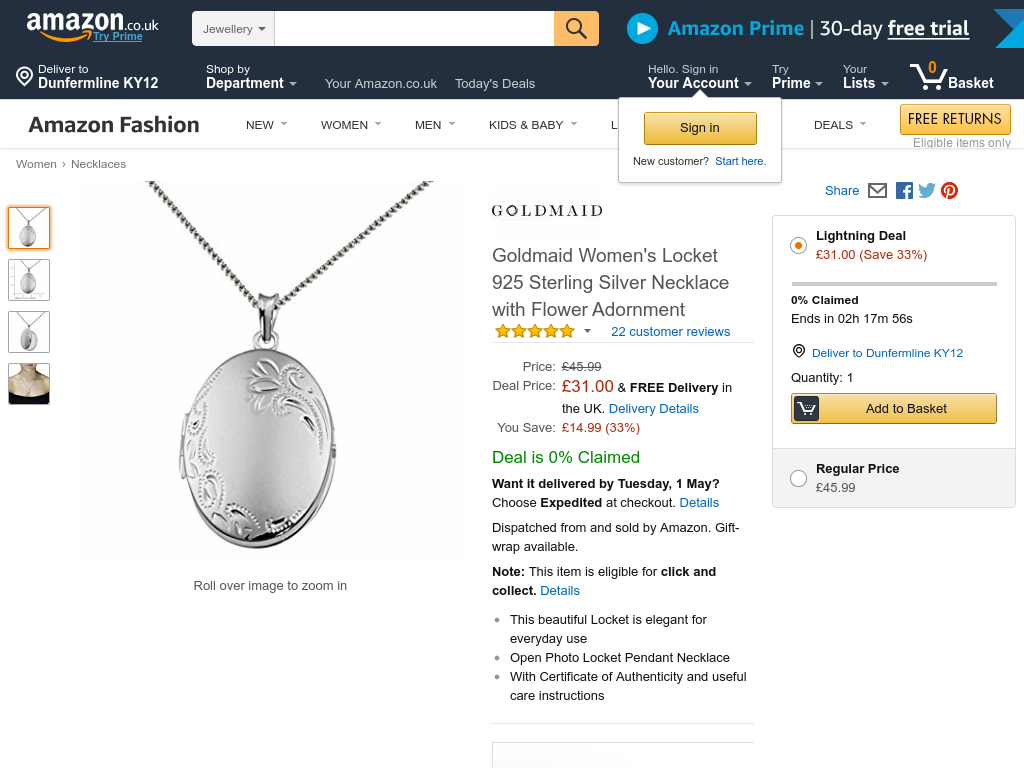

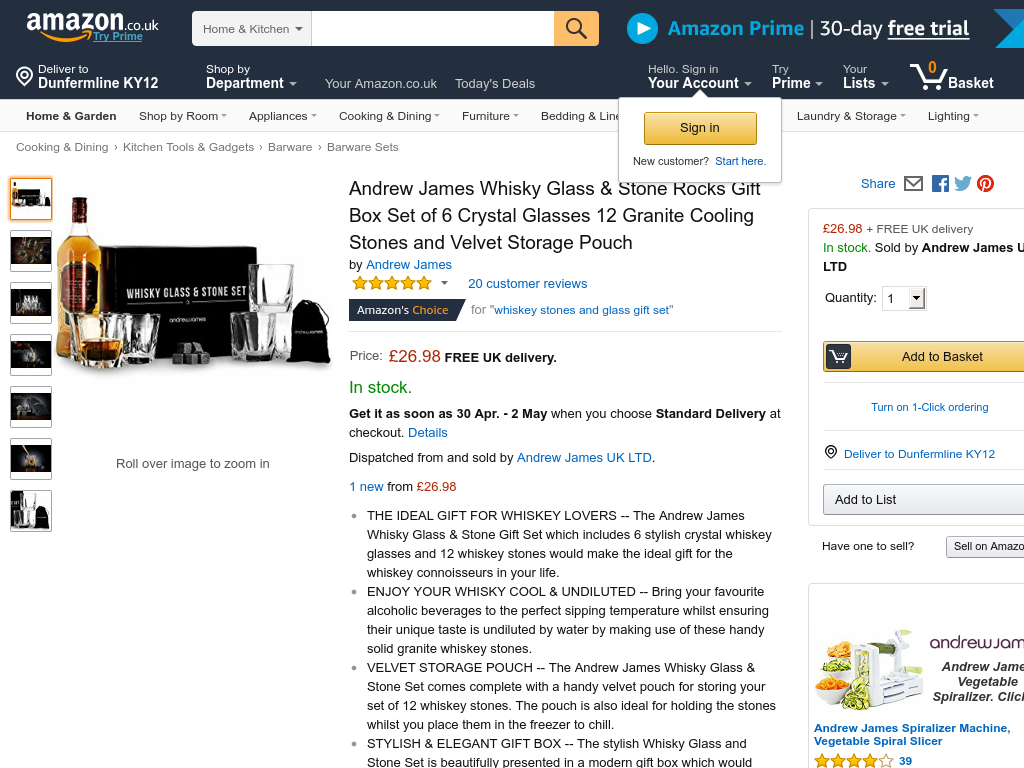

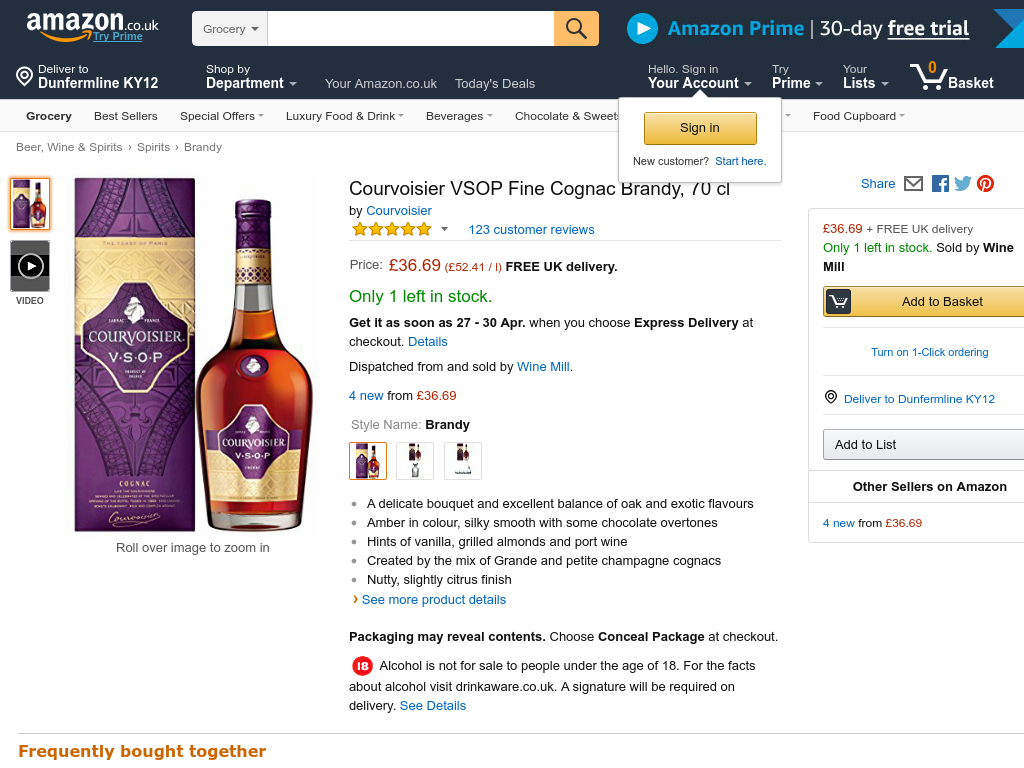

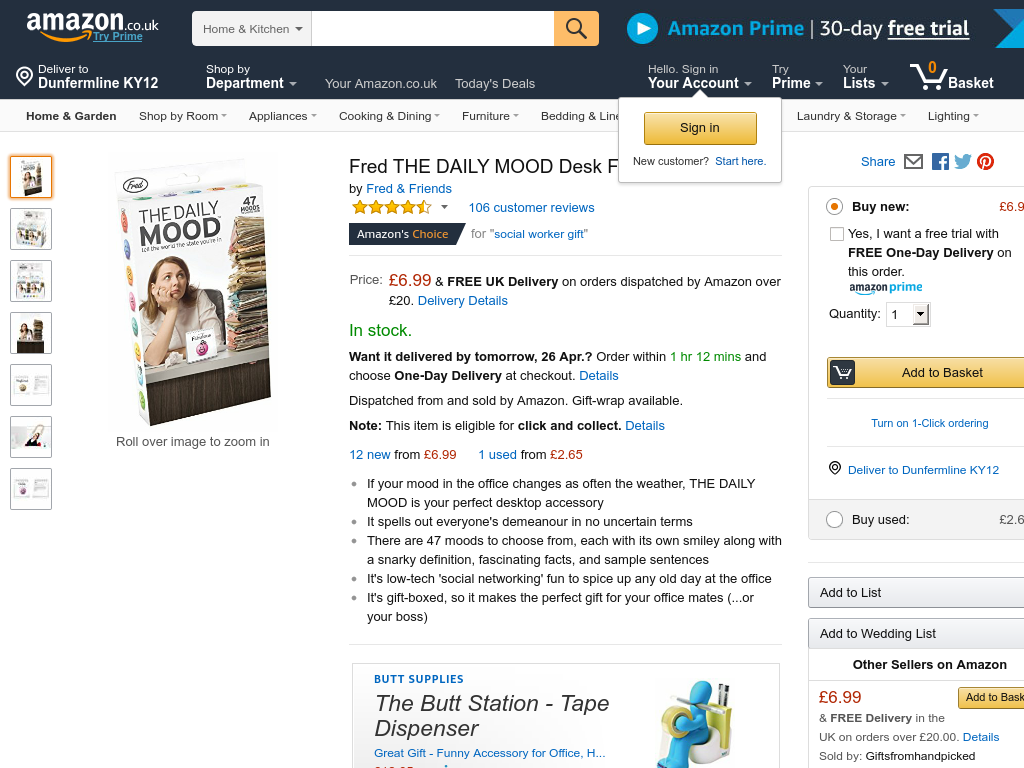

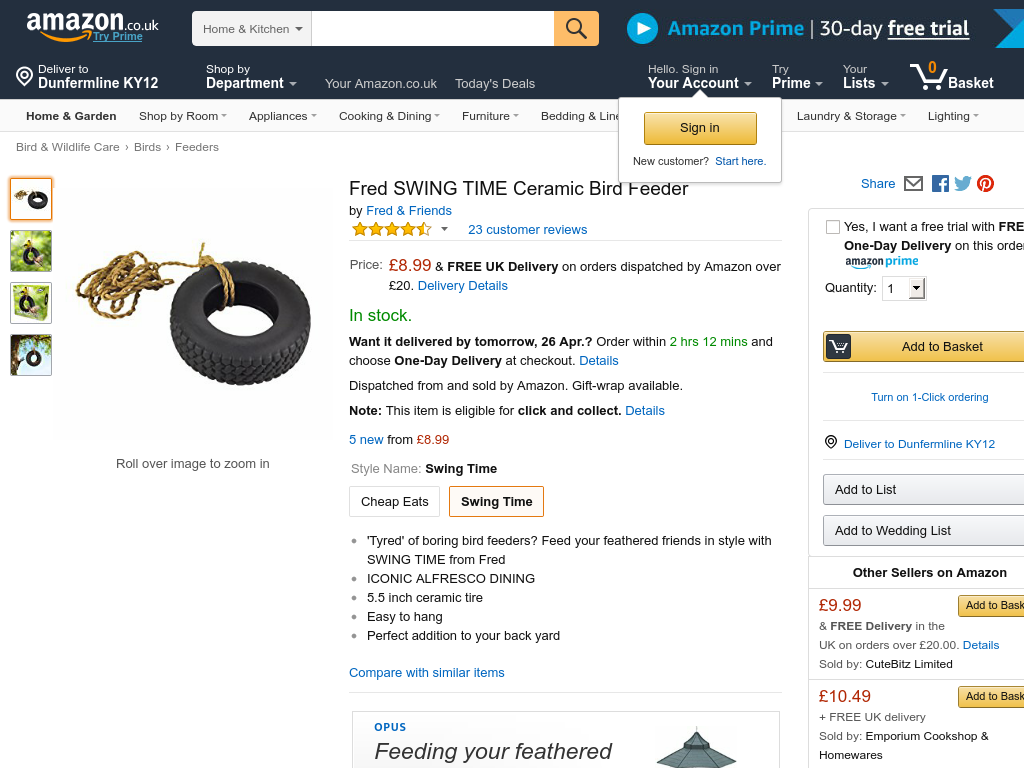

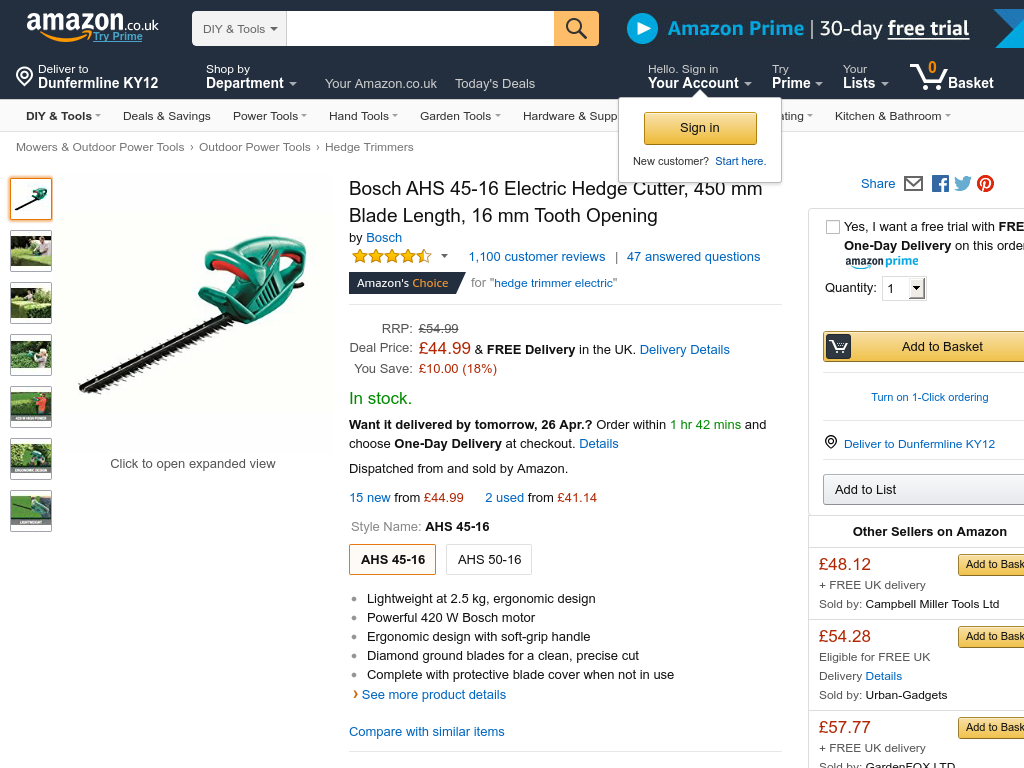

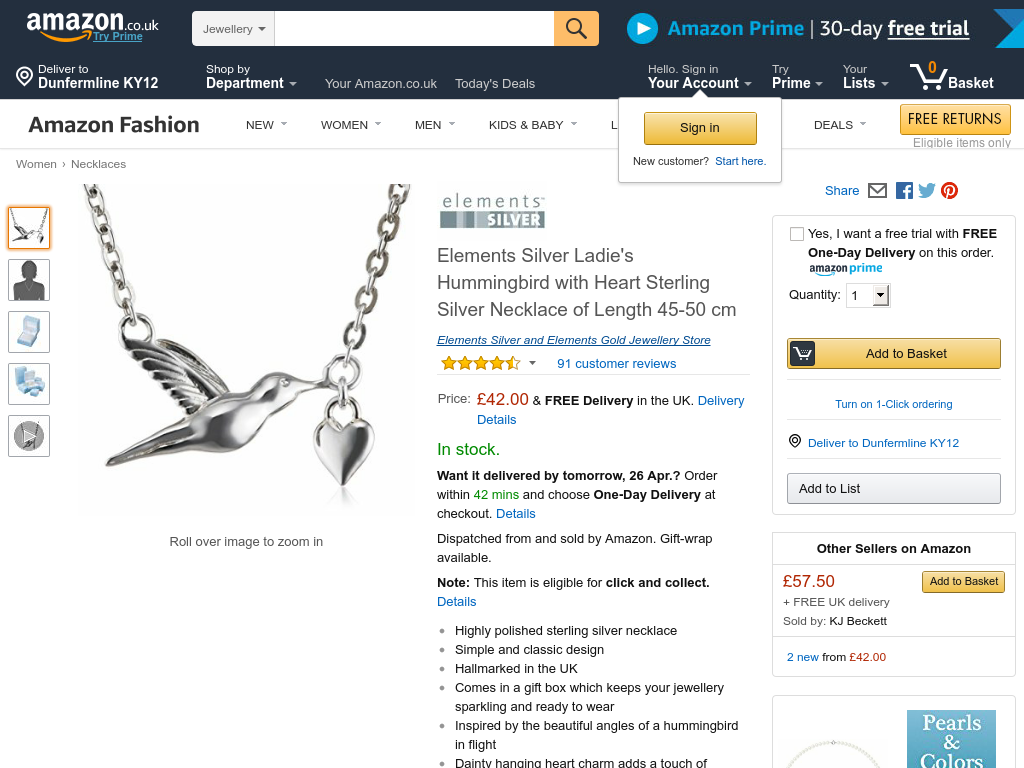

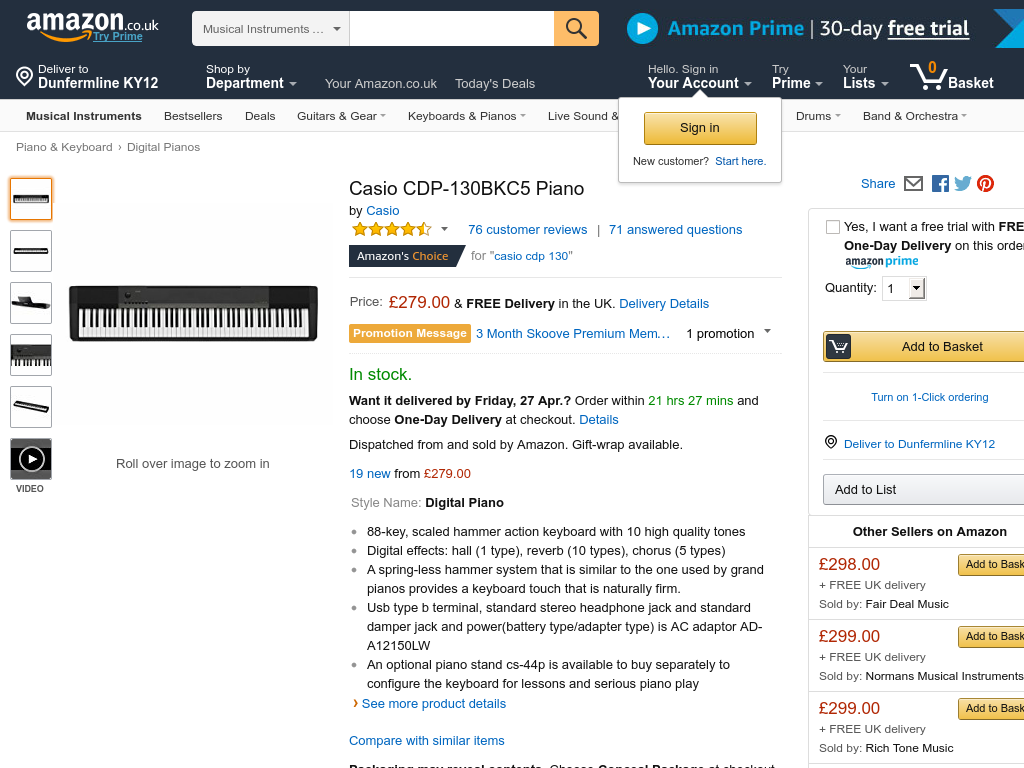

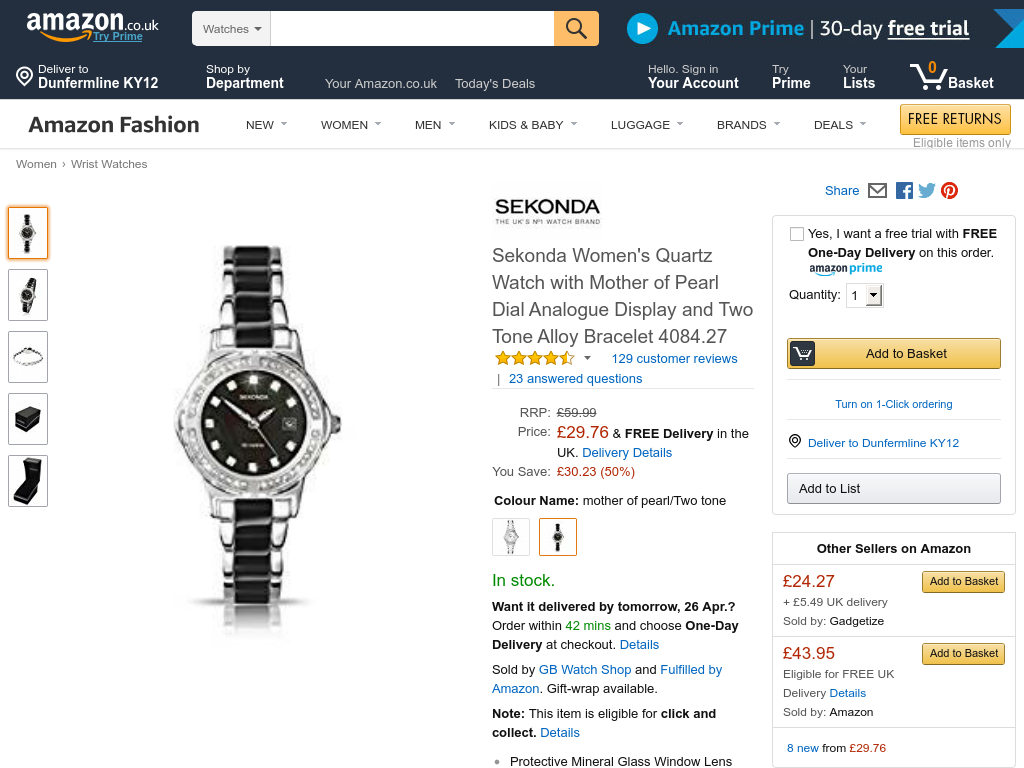

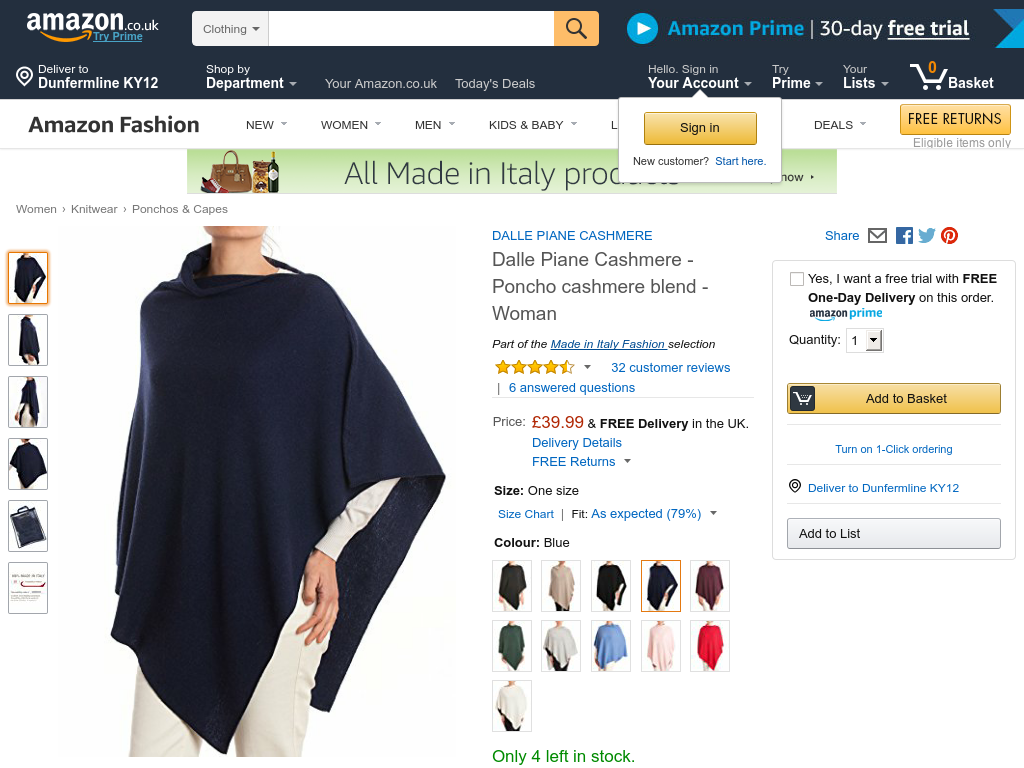

In [81]:
max_count = 10
count = 1
for index, row in df_sorted_rating.iterrows():
    response = fetch(row['url'])
    display(HTML('<h2>{}: {}</h2>'.format(count, row['title'])))
    # display(HTML(response.text))
    display(Image(data=response.json()['png'].encode('utf8'), format='png', embed=True, height=300, width=400))
    if count == max_count:
        break
    else:
        count += 1
        sleep(2)

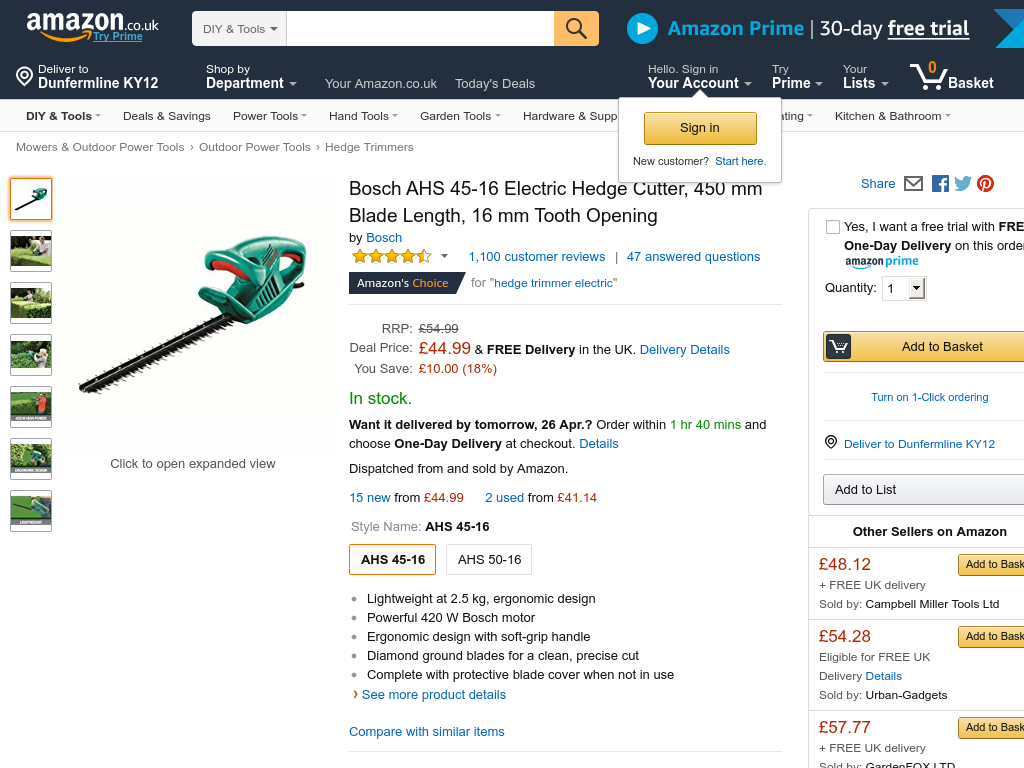

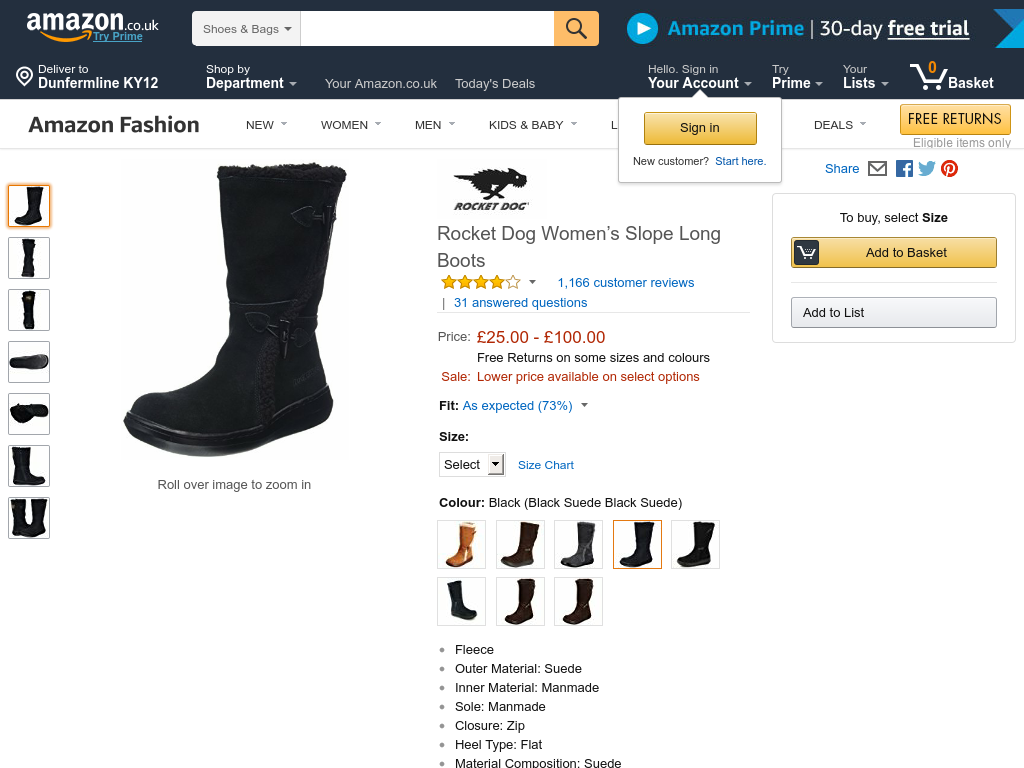

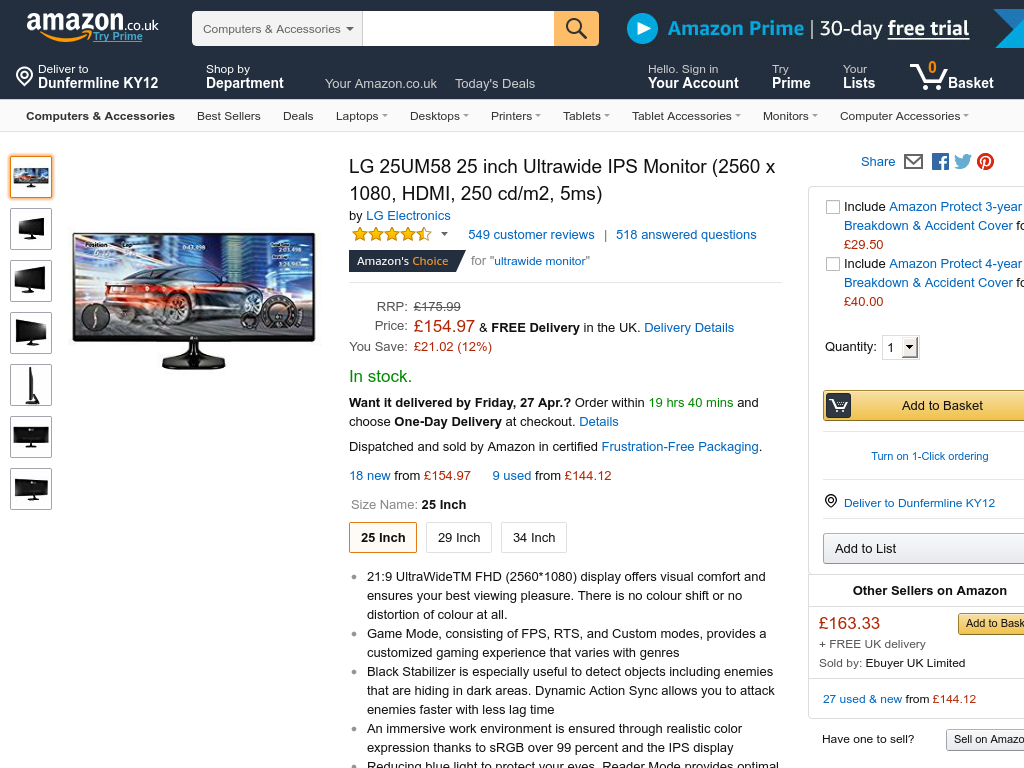

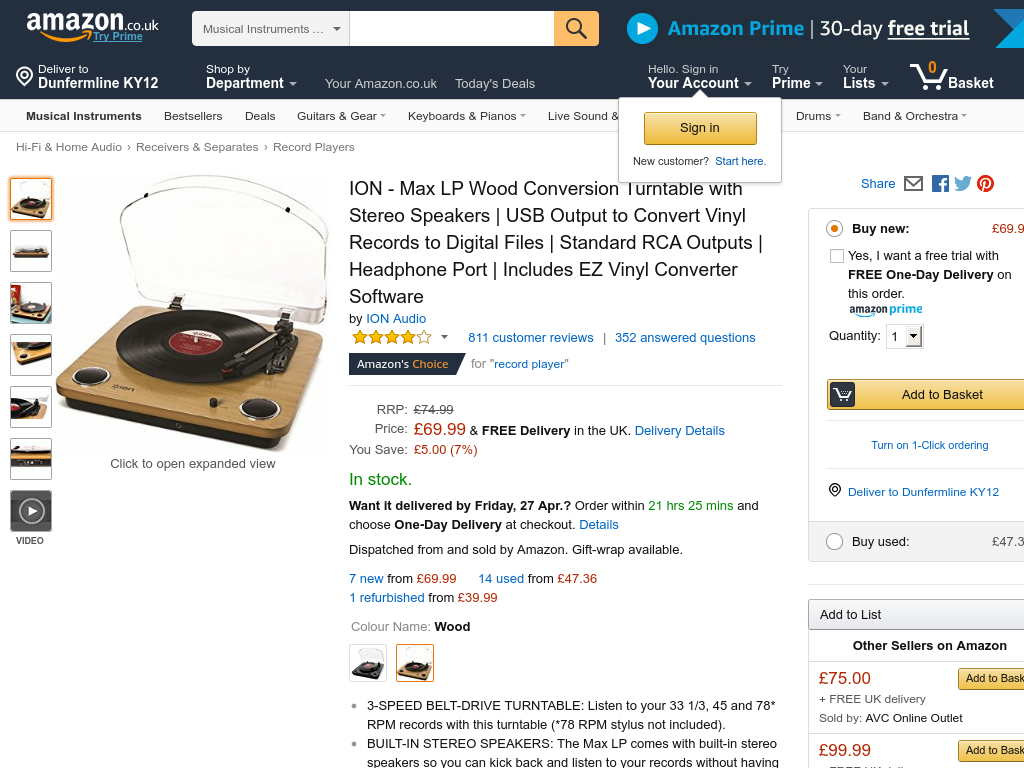

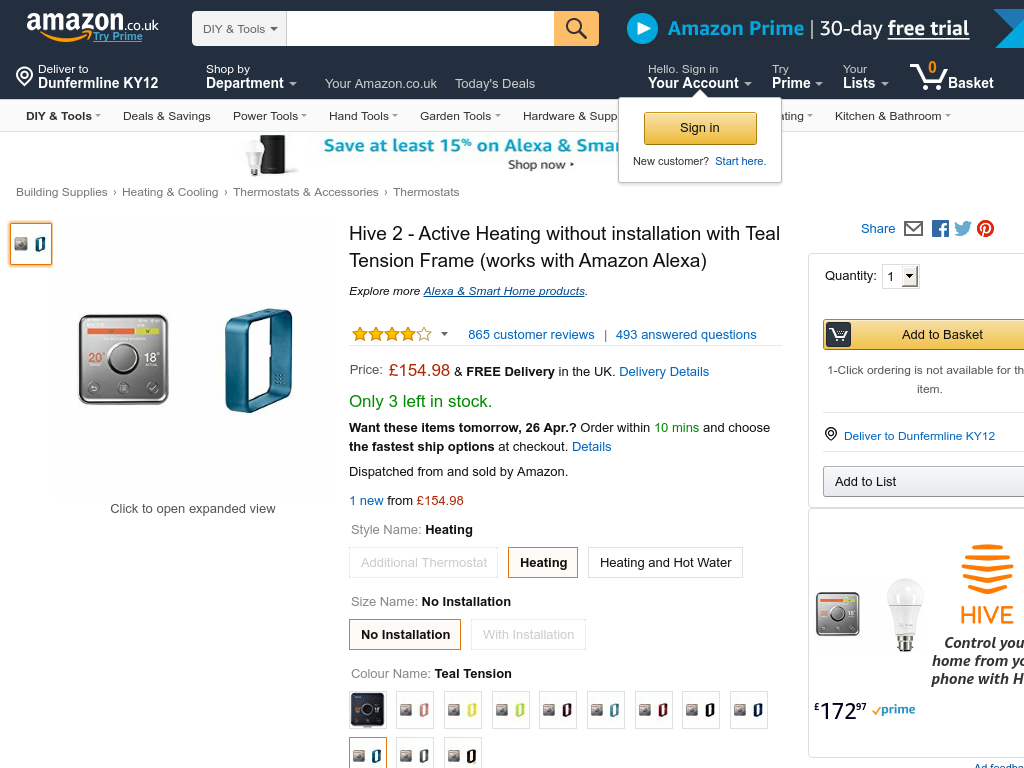

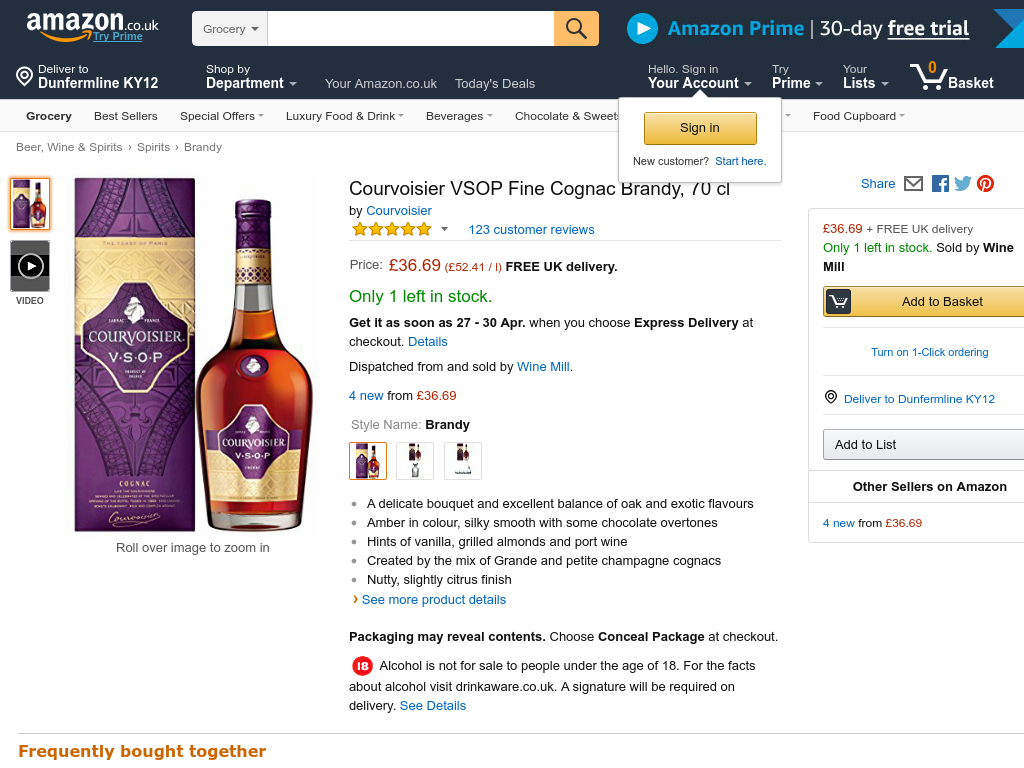

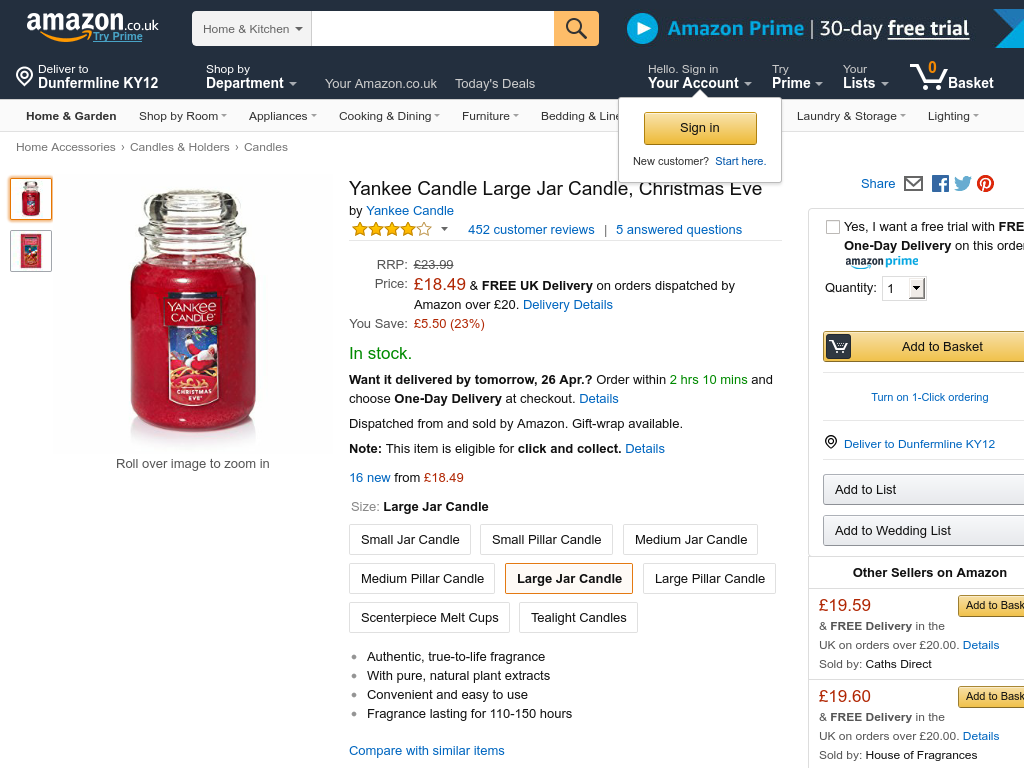

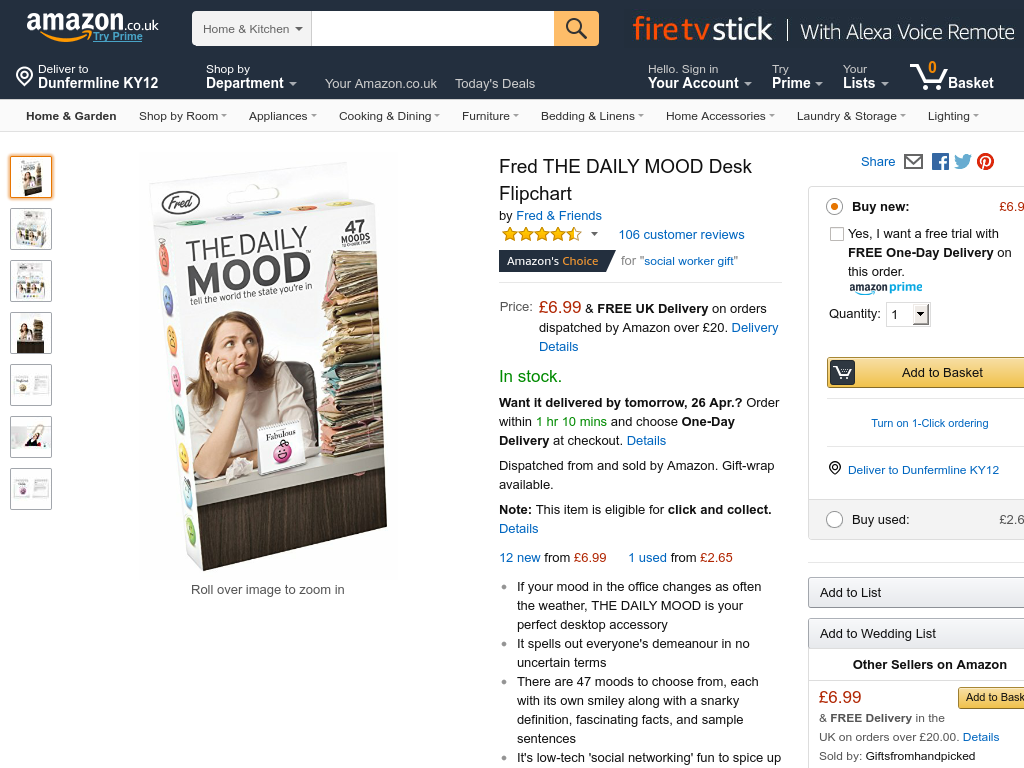

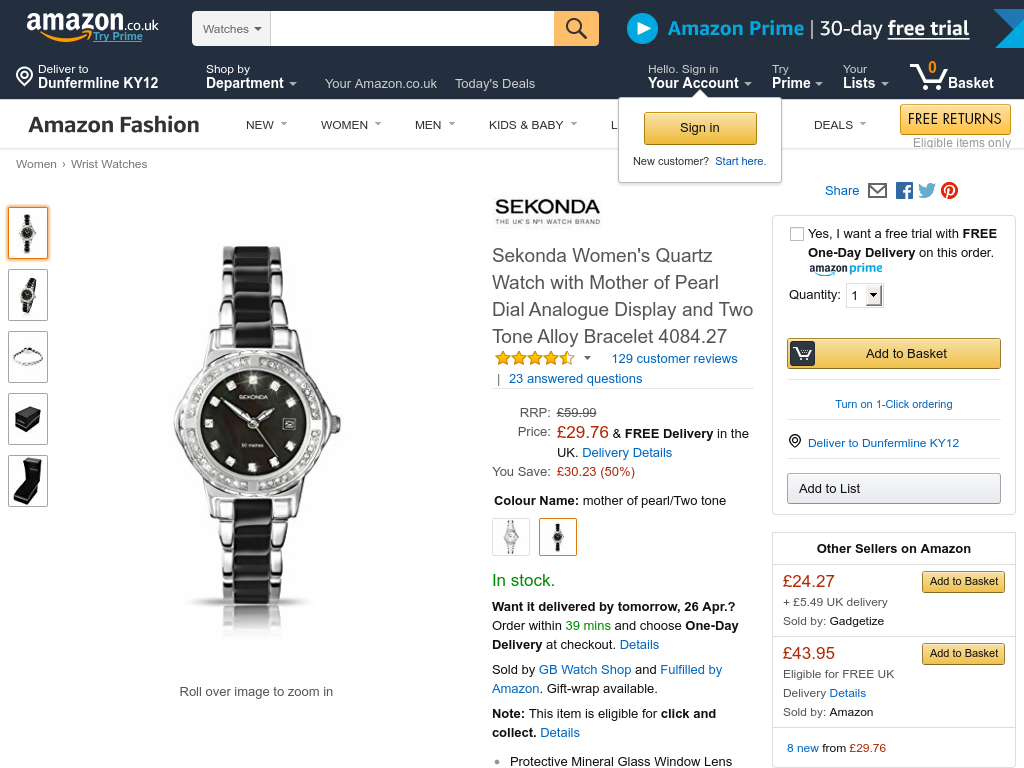

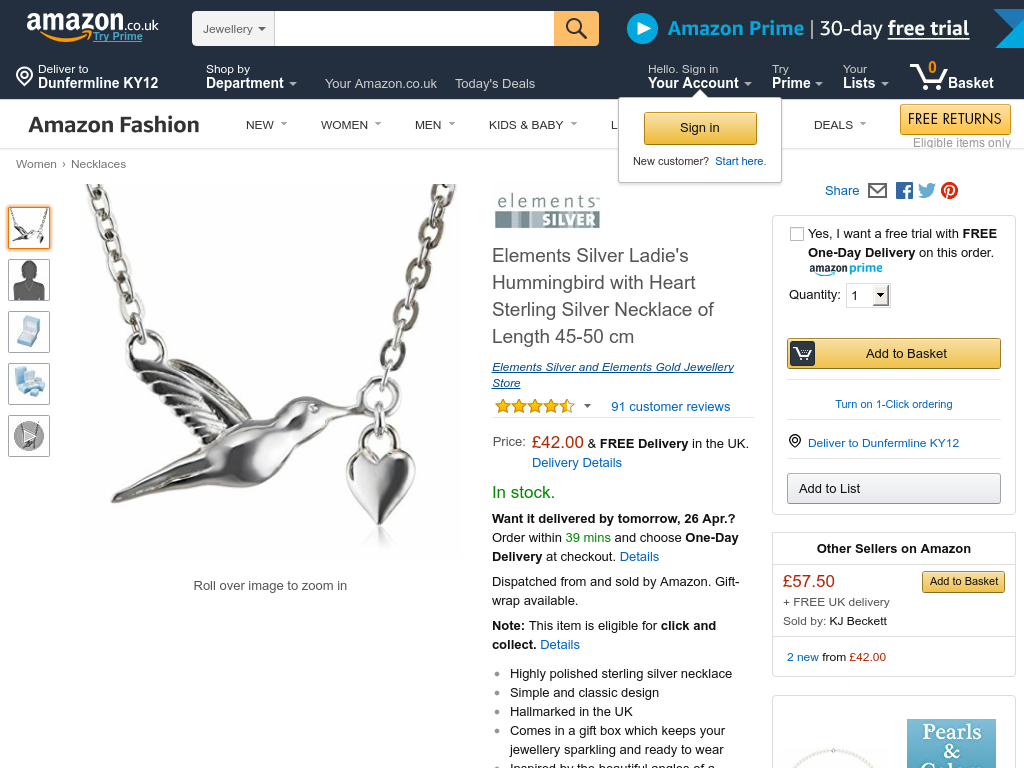

In [82]:
max_count = 10
count = 1
for index, row in df_sorted_etv.iterrows():
    response = fetch(row['url'])
    display(HTML('<h2>{}: {}</h2>'.format(count, row['title'])))
    # display(HTML(response.text))
    display(Image(data=response.json()['png'].encode('utf8'), format='png', embed=True, height=300, width=400))
    if count == max_count:
        break
    else:
        count += 1
        sleep(2)